In [1]:
pip install pandas matplotlib scikit-learn seaborn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 82.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 124.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 102.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 KB 67.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 KB 99.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 78.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.8/347.8 KB 97.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 126.0 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 140.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 117.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.0/325.0 KB 44.0 MB/s eta

Accuracy: 76.60142699463891 %


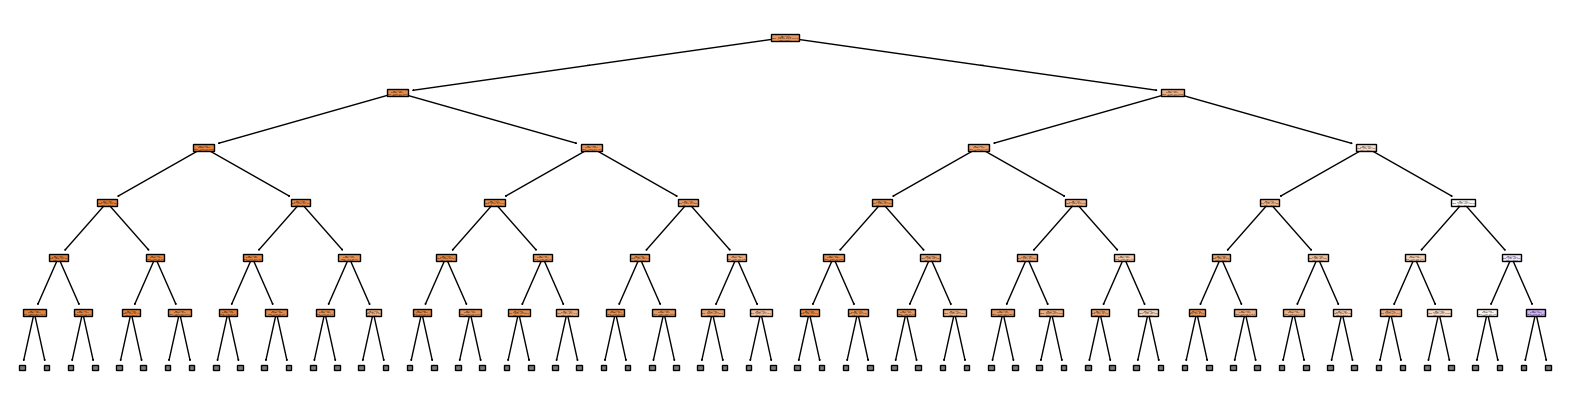

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

ds = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")

X = ds.drop(columns=["Diabetes_012"])
y = ds['Diabetes_012']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred)*100, "%")

plt.figure(figsize=(20,5))
plot_tree(model, filled=True, feature_names=X.columns, class_names=["Classe 0", "Classe 1", "Classe 2"], max_depth=5)
plt.savefig("grafico_alta_risoluzione.png", dpi=600)
plt.show()

              precision    recall  f1-score   support

         0.0       0.88      0.85      0.87     85569
         1.0       0.03      0.03      0.03      1865
         2.0       0.29      0.32      0.31     14038

    accuracy                           0.77    101472
   macro avg       0.40      0.40      0.40    101472
weighted avg       0.78      0.77      0.77    101472



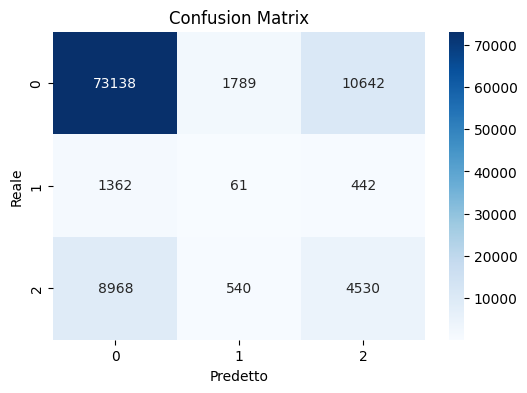

In [4]:
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

#visualizzazione della confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predetto")
plt.ylabel("Reale")
plt.title("Confusion Matrix")
plt.show()